I want to create a streamlit dashboard that allows a user to input how much they earn and see what percentile of earners they are in globally and then in each country.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
countries = gpd.read_file("countries.geojson")
countries["ADMIN"] = countries["ADMIN"].replace({'Czech Republic':'Czechia', 'Macedonia':'North Macedonia', 'Republic of Serbia':'Serbia', 'United States of America':'United States'})

<Axes: >

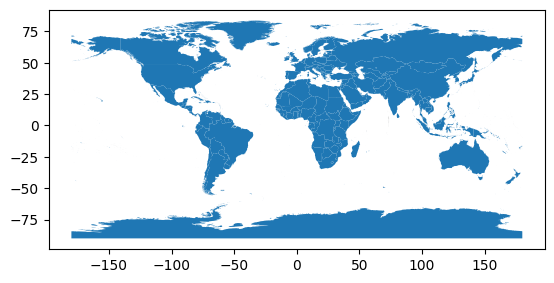

In [3]:
countries.plot()

In [4]:
population = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_85.csv", skiprows=[0,1,2])

In [5]:
population.rename(columns={"Country Name":"country", "Country Code":"iso", "2022":"population"}, inplace=True)

In [6]:
latest_population = population[["country", "iso", "population"]]

In [7]:
income_data = pd.read_html("https://www.worlddata.info/average-income.php")[0]

In [8]:
income_data.rename(columns={"Ø Annual income":"annual_income", "Country/Region":"country"}, inplace=True)

In [9]:
income_data["annual_income"] = income_data["annual_income"].str.replace("$", "").str.replace(",", "").astype(int)

In [10]:
income_population = latest_population.merge(income_data, on="country")

In [11]:
income_population_countries = countries.merge(income_population, left_on="ADMIN", right_on="country")

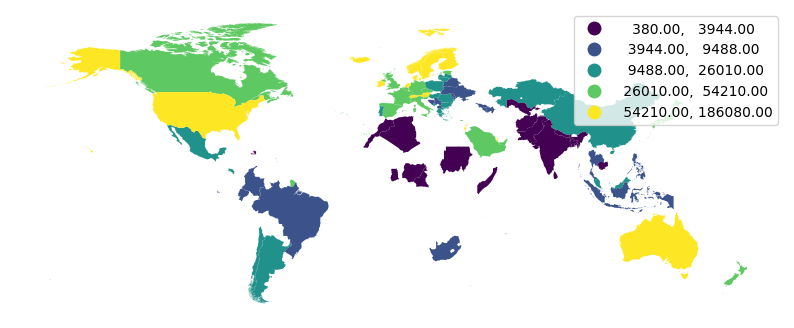

In [12]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,8))
income_population_countries.plot(column="annual_income", legend=True, cmap="viridis", ax=ax, scheme="Quantiles")
ax.set_axis_off()

In [22]:
income_population["scaled_pop"] = income_population["population"] / income_population["population"].max()

In [24]:
income_population["scaled_pop"] = 1000 * income_population["scaled_pop"]

In [26]:
income_dist = np.repeat(income_population["annual_income"], income_population["scaled_pop"])

In [37]:
from scipy import stats
100 - stats.percentileofscore(income_dist, 35000)

14.925725064843192